# Importing Libraries

In [929]:
# Data processing
import pandas as pd
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt
# Visualization
import seaborn as sns
# Similarity
from sklearn.metrics.pairwise import cosine_similarity
from scipy.spatial.distance import euclidean
from scipy.spatial.distance import cosine

# Import Data

In [930]:
# Read in data
ratings=pd.read_excel('Final Final.xlsx',header=0)
# Take a look at the data 
print(ratings.head())

   Respondent ID  Collector ID          Start Date            End Date   
0            NaN           NaN                 NaT                 NaT  \
1   1.183101e+11   450211406.0 2023-05-03 18:39:08 2023-05-03 18:41:14   
2   1.183096e+11   450211406.0 2023-05-03 09:08:53 2023-05-03 09:13:42   
3   1.183094e+11   450211406.0 2023-05-03 01:06:15 2023-05-03 01:10:03   
4   1.183092e+11   450211406.0 2023-05-02 20:23:58 2023-05-02 20:26:49   

        IP Address  Email Address  First Name  Last Name  Custom Data 1   
0              NaN            NaN         NaN        NaN            NaN  \
1    104.28.86.111            NaN         NaN        NaN            NaN   
2  154.236.163.130            NaN         NaN        NaN            NaN   
3   197.44.132.129            NaN         NaN        NaN            NaN   
4  156.200.117.199            NaN         NaN        NaN            NaN   

  Collaborative or Competitive?  ... What is your sub-major?   
0           Open-Ended Response  ...    

# Data Preprocessing and cleaning

## Rename columns

In [931]:
ratings.rename(columns={"Instinctive: People who are driven by utilizing past experiences,intuition and seeking specific knowledge when necessary.or Intellectual: People who are driven by opportunities to learn, acquireknowledge and the discovery of truth":"II"}, inplace=True)
ratings.rename(columns={"Selfless: People who are driven by completing tasks for the sake ofcompletion, with little expectation of personal returnor Resourceful: People who are driven by practical results, maximizingboth efficiency and returns for their investments of time, talent, energy andresources.":"SR"}, inplace=True)
ratings.rename(columns={"Objective: People who are driven by the functionality and objectivity oftheir surroundings.or Harmonious: People who are driven by the experience, subjectiveviewpoints and balance in their surroundings.":"OR"}, inplace=True)
ratings.rename(columns={"Intentional: People who are driven to assist others for a specificpurpose, not just for the sake of being helpful or supportive. or Altruistic: People who are driven to assist others for the satisfaction ofbeing helpful or supportive.":"IA"}, inplace=True)
ratings.rename(columns={"Commanding: People who are driven by status, recognition and controlover personal freedom.orCollaborative: People who are driven by being in a supporting role andcontributing with little need for individual recognition.":"CC"}, inplace=True)
ratings.rename(columns={"Receptive: People who are driven by new ideas, methods andopportunities that fall outside a defined system for living.or Structured: People who are driven by traditional approaches, provenmethods and a defined system for living.":"RS"}, inplace=True)


## Remove Unnecessery data

In [932]:
# Remove second row (question type)
ratings = ratings.drop(ratings.index[0])
print(ratings.head())

   Respondent ID  Collector ID          Start Date            End Date   
1   1.183101e+11   450211406.0 2023-05-03 18:39:08 2023-05-03 18:41:14  \
2   1.183096e+11   450211406.0 2023-05-03 09:08:53 2023-05-03 09:13:42   
3   1.183094e+11   450211406.0 2023-05-03 01:06:15 2023-05-03 01:10:03   
4   1.183092e+11   450211406.0 2023-05-02 20:23:58 2023-05-02 20:26:49   
5   1.183090e+11   450211406.0 2023-05-02 18:28:22 2023-05-02 18:30:51   

        IP Address  Email Address  First Name  Last Name  Custom Data 1   
1    104.28.86.111            NaN         NaN        NaN            NaN  \
2  154.236.163.130            NaN         NaN        NaN            NaN   
3   197.44.132.129            NaN         NaN        NaN            NaN   
4  156.200.117.199            NaN         NaN        NaN            NaN   
5      92.40.186.2            NaN         NaN        NaN            NaN   

  Collaborative or Competitive?  ...     What is your sub-major? Unnamed: 40   
1                       

In [933]:
# Remove unnecessary columns
dropped_columns = [0,1,2,3,4,5,6,7,8]
ratings = ratings.drop(ratings.columns[dropped_columns],axis=1)
ratings.head()

,Collaborative or Competitive?,Wise Mover or Fast Mover?,Calculative or Risk Taker?,Receive Instructions or Give Instructions?,Research Driven or Experience Driven?,Skeptical or Trust Easily?,Convince Small Groups or Inspire Masses?,Shy for Spotlight or Like to be Under Spotlight?,Confrontational or Non-Confrontational?,Prefer to Show Emotion or Not to Show Emotion?,...,What is your sub-major?,Unnamed: 40,What is your sub-major?.1,Unnamed: 42,What is your sub-major?.2,Unnamed: 44,How passionate are you about your major?,How are you academically performing in your major?,Is there another major you would have liked to explore?,Unnamed: 48
1,5,-3,-4,5,-2,-5,5,5,2,-1,...,NaN,NaN,NaN,NaN,NaN,NaN,7,8,Computing,NaN
2,-3,-5,-2,0,5,1,1,-5,2,1,...,NaN,NaN,Interior Architecture,NaN,NaN,NaN,6,6,"No, I am happy with the major I chose.",NaN
3,-3,-4,-3,-2,-1,2,-3,-5,5,3,...,NaN,NaN,NaN,NaN,NaN,NaN,10,8,"No, I am happy with the major I chose.",NaN
4,2,-5,3,3,2,-2,4,5,-3,5,...,NaN,NaN,NaN,NaN,NaN,NaN,8,6,Psychology,NaN
5,5,-5,5,5,5,5,5,5,-5,5,...,Computer Science/Computing,NaN,NaN,NaN,NaN,NaN,3,7,Business,NaN


## Remove NA Values

In [934]:
ratings_num = ratings.drop(ratings.columns[22:],axis=1)
ratings_num.head()
ratings_filled = ratings_num.fillna(0)
ratings_filled.head()

,Collaborative or Competitive?,Wise Mover or Fast Mover?,Calculative or Risk Taker?,Receive Instructions or Give Instructions?,Research Driven or Experience Driven?,Skeptical or Trust Easily?,Convince Small Groups or Inspire Masses?,Shy for Spotlight or Like to be Under Spotlight?,Confrontational or Non-Confrontational?,Prefer to Show Emotion or Not to Show Emotion?,...,Satisfactory or Perfectionist?,Facial Expression or Poker Face?,Shortcuts or Details?,Perform well when under:No Constraints or Concrete Process,II,SR,OR,IA,CC,RS
1,5,-3,-4,5,-2,-5,5,5,2,-1,...,5,-2,5,5,5,-5,-4,-4,-5,5
2,-3,-5,-2,0,5,1,1,-5,2,1,...,-2,-1,2,0,5,-1,2,-3,3,-3
3,-3,-4,-3,-2,-1,2,-3,-5,5,3,...,2,-2,0,3,4,-3,0,5,5,1
4,2,-5,3,3,2,-2,4,5,-3,5,...,5,5,1,3,2,3,3,-3,-2,-2
5,5,-5,5,5,5,5,5,5,-5,5,...,-5,5,-5,5,-5,2,5,3,3,5


## Create Matrix

In [935]:
# Rename index and columns
ratings_filled.index.name='Users'
ratings_filled.columns.name='Questions'
# Cast values to int type
ratings_filled2 = ratings_filled.astype('float')

## Calculate Averages

### Calculate Dominant Average

In [936]:
ratings_filled2["DAvg"] = (ratings_filled2["Collaborative or Competitive?"] +ratings_filled2["Wise Mover or Fast Mover?"]+ratings_filled2["Calculative or Risk Taker?"]+ratings_filled2["Receive Instructions or Give Instructions?"]) /4
ratingstest = ratings.fillna(0)
ratingstest['DAvg'] = ratings_filled2['DAvg']
ratingstest['How passionate are you about your major?']=ratingstest['How passionate are you about your major?'].astype('int')
ratingstest['How are you academically performing in your major?']=ratingstest['How are you academically performing in your major?'].astype('int')
DAvg_corr_passion = abs(ratingstest['DAvg'].corr(ratingstest['How passionate are you about your major?']))
DAvg_corr_academics = abs(ratingstest['DAvg'].corr(ratingstest['How are you academically performing in your major?']))
print(DAvg_corr_passion)
print(DAvg_corr_academics)

0.09836026387397973
0.08268615648951018


### Calculate Influential Average

In [937]:
ratings_filled2["IAvg"] = (ratings_filled2["Research Driven or Experience Driven?"] +ratings_filled2["Skeptical or Trust Easily?"]+ratings_filled2["Convince Small Groups or Inspire Masses?"]+ratings_filled2["Shy for Spotlight or Like to be Under Spotlight?"]) /4
ratingstest = ratingstest.fillna(0)
ratingstest['IAvg'] = ratings_filled2['IAvg']
ratingstest['How passionate are you about your major?']=ratingstest['How passionate are you about your major?'].astype('int')
ratingstest['How are you academically performing in your major?']=ratingstest['How are you academically performing in your major?'].astype('int')
IAvg_corr_passion = abs(ratingstest['IAvg'].corr(ratingstest['How passionate are you about your major?']))
IAvg_corr_academics = abs(ratingstest['IAvg'].corr(ratingstest['How are you academically performing in your major?']))
print(IAvg_corr_passion)
print(IAvg_corr_academics)

0.07001095322799533
0.06759026052743185


### Calculate Steadiness Average

In [938]:
ratings_filled2["SAvg"] = (ratings_filled2["Confrontational or Non-Confrontational?"] +ratings_filled2["Prefer to Show Emotion or Not to Show Emotion?"]+ratings_filled2["Into Adventure or Into Security?"]+ratings_filled2["Into Change or Into Steadiness?"]) /4
ratingstest = ratingstest.fillna(0)
ratingstest['SAvg'] = ratings_filled2['SAvg']
ratingstest['How passionate are you about your major?']=ratingstest['How passionate are you about your major?'].astype('int')
ratingstest['How are you academically performing in your major?']=ratingstest['How are you academically performing in your major?'].astype('int')
SAvg_corr_passion = abs(ratingstest['SAvg'].corr(ratingstest['How passionate are you about your major?']))
SAvg_corr_academics = abs(ratingstest['SAvg'].corr(ratingstest['How are you academically performing in your major?']))
print(SAvg_corr_passion)
print(SAvg_corr_academics)

0.08013531442819002
0.20758234888637433


### Calculate Compliance Average

In [939]:
ratings_filled2["CAvg"] = (ratings_filled2["Satisfactory or Perfectionist?"] +ratings_filled2["Facial Expression or Poker Face?"]+ratings_filled2["Shortcuts or Details?"]+ratings_filled2["Perform well when under:No Constraints or Concrete Process"]) /4
ratingstest = ratingstest.fillna(0)
ratingstest['CAvg'] = ratings_filled2['CAvg']
ratingstest['How passionate are you about your major?']=ratingstest['How passionate are you about your major?'].astype('int')
ratingstest['How are you academically performing in your major?']=ratingstest['How are you academically performing in your major?'].astype('int')
CAvg_corr_passion = abs(ratingstest['CAvg'].corr(ratingstest['How passionate are you about your major?']))
CAvg_corr_academics = abs(ratingstest['CAvg'].corr(ratingstest['How are you academically performing in your major?']))
print(CAvg_corr_passion)
print(CAvg_corr_academics)

0.009032624292341909
0.03584167448693139


## Remove calculated average fields

In [940]:
ratings_filled2 = ratings_filled2.drop(ratings_filled2.columns[:16],axis=1)
ratings_filled2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 1 to 159
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   II      159 non-null    float64
 1   SR      159 non-null    float64
 2   OR      159 non-null    float64
 3   IA      159 non-null    float64
 4   CC      159 non-null    float64
 5   RS      159 non-null    float64
 6   DAvg    159 non-null    float64
 7   IAvg    159 non-null    float64
 8   SAvg    159 non-null    float64
 9   CAvg    159 non-null    float64
dtypes: float64(10)
memory usage: 12.6 KB


In [941]:
# ratings_filled2['D'] = np.where(ratings_filled2['DAvg']> 0, 1, 0)
# ratings_filled2['I'] = np.where(ratings_filled2['IAvg']> 0, 1, 0)
# ratings_filled2['S'] = np.where(ratings_filled2['SAvg']> 0, 1, 0)
# ratings_filled2['C'] = np.where(ratings_filled2['CAvg']> 0, 1, 0)
# ratings_filled2.info()
# ratings_filled2.head()
# ratings_filled2= ratings_filled2.drop(ratings_filled2.columns[6:10],axis=1)
# ratings_filled2.head()


# Recommendation Algorithm

In [942]:
# Create comparison dataframe
comparison_df = ratings[["What is/was your major?","How passionate are you about your major?",'How are you academically performing in your major?']]
comparison_df.info()
comparison_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 1 to 159
Data columns (total 3 columns):
 #   Column                                              Non-Null Count  Dtype 
---  ------                                              --------------  ----- 
 0   What is/was your major?                             159 non-null    object
 1   How passionate are you about your major?            159 non-null    object
 2   How are you academically performing in your major?  159 non-null    object
dtypes: object(3)
memory usage: 3.9+ KB


,What is/was your major?,How passionate are you about your major?,How are you academically performing in your major?
Users,,,
1,Engineering,7,8
2,Design and Media,6,6
3,Psychology,10,8
4,Medicine,8,6
5,Computing,3,7


### Export DFs

In [943]:
ratings_filled2.to_csv('ratings_filled2.csv')
comparison_df.to_csv('comparison_df.csv')

# EDA

In [944]:
# Merge the two tables based on the ID column
merged_df = pd.merge(ratings_filled2, comparison_df, on='Users')
merged_df.rename(columns={'What is/was your major?': 'Major'}, inplace=True)
merged_df.rename(columns={'How passionate are you about your major?': 'Passion'}, inplace=True)
merged_df.rename(columns={'How are you academically performing in your major?': 'Academics'}, inplace=True)
merged_df = merged_df.astype({"Academics": float,"Passion":float})
merged_df['Major'] = np.where(merged_df['Major']== "Medicine", "Engineering", merged_df['Major'])
merged_df['Major'] = np.where(merged_df['Major']== "Business", "Engineering", merged_df['Major'])
merged_df['Major'] = np.where(merged_df['Major']== "Psychology", "Design and Media", merged_df['Major'])
# Display the merged dataframe
merged_df.head()

,II,SR,OR,IA,CC,RS,DAvg,IAvg,SAvg,CAvg,Major,Passion,Academics
Users,,,,,,,,,,,,,
1,5.0,-5.0,-4.0,-4.0,-5.0,5.0,0.75,0.75,0.25,3.25,Engineering,7.0,8.0
2,5.0,-1.0,2.0,-3.0,3.0,-3.0,-2.50,0.50,0.50,-0.25,Design and Media,6.0,6.0
3,4.0,-3.0,0.0,5.0,5.0,1.0,-3.00,-1.75,2.50,0.75,Design and Media,10.0,8.0
4,2.0,3.0,3.0,-3.0,-2.0,-2.0,0.75,2.25,-0.75,3.50,Engineering,8.0,6.0
5,-5.0,2.0,5.0,3.0,3.0,5.0,2.50,5.00,0.00,0.00,Computing,3.0,7.0


In [945]:
# Add a new column "Personality Type" based on the scores
merged_df['Type'] = merged_df.apply(lambda row: ''.join([aspect for aspect, score in zip(['D', 'I', 'S', 'C'], [row['DAvg'], row['IAvg'], row['SAvg'], row['CAvg']]) if score > -0.5]), axis=1)

# Display the modified DataFrame
merged_df


,II,SR,OR,IA,CC,RS,DAvg,IAvg,SAvg,CAvg,Major,Passion,Academics,Type
Users,,,,,,,,,,,,,,
1,5.0,-5.0,-4.0,-4.0,-5.0,5.0,0.75,0.75,0.25,3.25,Engineering,7.0,8.0,DISC
2,5.0,-1.0,2.0,-3.0,3.0,-3.0,-2.50,0.50,0.50,-0.25,Design and Media,6.0,6.0,ISC
3,4.0,-3.0,0.0,5.0,5.0,1.0,-3.00,-1.75,2.50,0.75,Design and Media,10.0,8.0,SC
4,2.0,3.0,3.0,-3.0,-2.0,-2.0,0.75,2.25,-0.75,3.50,Engineering,8.0,6.0,DIC
5,-5.0,2.0,5.0,3.0,3.0,5.0,2.50,5.00,0.00,0.00,Computing,3.0,7.0,DISC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,-4.0,5.0,-3.0,2.0,4.0,-4.0,1.50,0.50,-1.50,1.25,Computing,7.0,6.0,DIC
156,-2.0,-3.0,3.0,5.0,4.0,-3.0,-0.75,-2.00,1.50,-1.25,Computing,8.0,7.0,S
157,1.0,-2.0,-3.0,2.0,3.0,-3.0,-1.25,0.25,0.00,2.50,Computing,5.0,5.0,ISC


In [946]:
mean_performance =merged_df['Academics'].mean()
mean_passion =merged_df['Passion'].mean()
std_performance = merged_df['Academics'].std()

# Calculate frequency distribution
frequency_dist = merged_df['Major'].value_counts()
print(mean_performance)
print(mean_passion)
print(std_performance)
print(frequency_dist)

6.622641509433962
6.735849056603773
1.9016290327679743
Major
Computing           66
Engineering         51
Design and Media    42
Name: count, dtype: int64


Major
Computing           66
Engineering         51
Design and Media    42
Name: count, dtype: int64


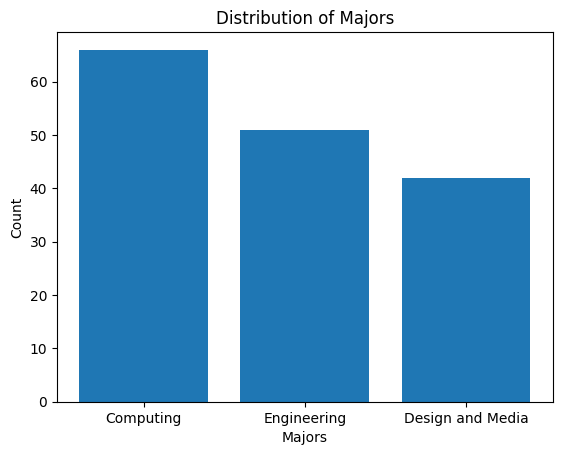

<class 'pandas.core.frame.DataFrame'>
Index: 159 entries, 1 to 159
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   II         159 non-null    float64
 1   SR         159 non-null    float64
 2   OR         159 non-null    float64
 3   IA         159 non-null    float64
 4   CC         159 non-null    float64
 5   RS         159 non-null    float64
 6   DAvg       159 non-null    float64
 7   IAvg       159 non-null    float64
 8   SAvg       159 non-null    float64
 9   CAvg       159 non-null    float64
 10  Major      159 non-null    object 
 11  Passion    159 non-null    float64
 12  Academics  159 non-null    float64
 13  Type       159 non-null    object 
dtypes: float64(12), object(2)
memory usage: 18.6+ KB
None


In [947]:
major_counts = merged_df['Major'].value_counts()
print(merged_df['Major'].value_counts())
plt.bar(major_counts.index, major_counts.values)
plt.xlabel('Majors')
plt.ylabel('Count')
plt.title('Distribution of Majors')
plt.show()
print(merged_df.info())

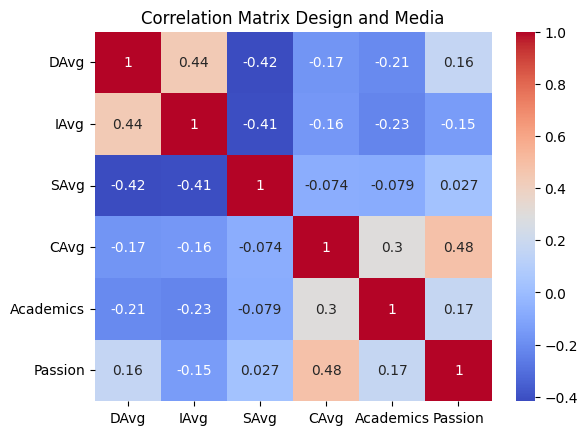

In [948]:
specific_major = 'Design and Media'
filtered_df = merged_df[merged_df['Major'] == specific_major]
# Calculate correlation matrix
correlation_matrix = filtered_df[['DAvg','IAvg','SAvg','CAvg', 'Academics', 'Passion']].corr()
# correlation_matrix = filtered_df[['D','I','S','C', 'Academics', 'Passion']].corr()

# Visualize correlation matrix using heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Design and Media')
plt.show()

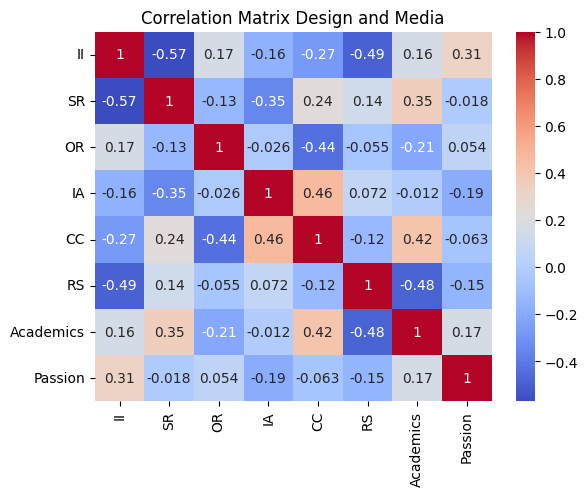

In [949]:

# Calculate correlation matrix
correlation_matrix = filtered_df[['II',	"SR",	"OR",	"IA",	"CC",	"RS", 'Academics', 'Passion']].corr()

# Visualize correlation matrix using heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Design and Media')
plt.show()

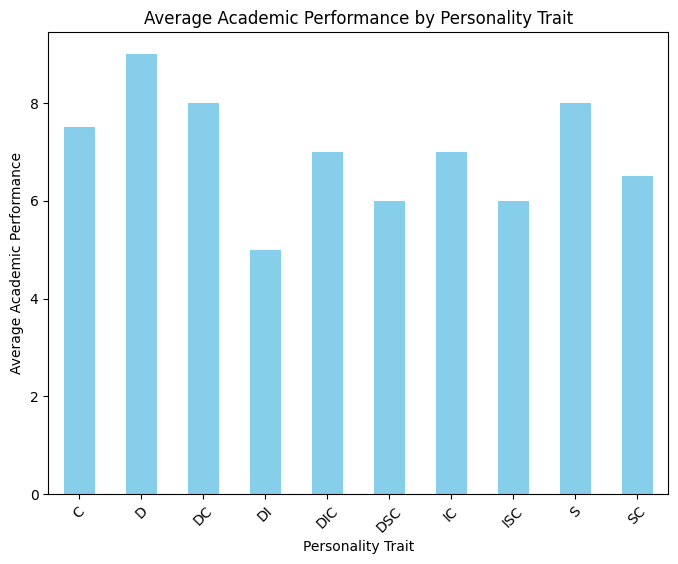

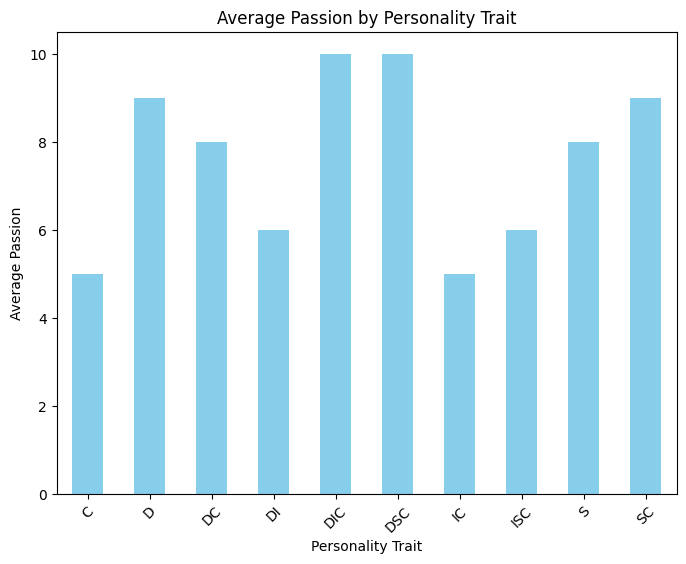

In [950]:


# Group by personality type and calculate average performance
average_performance_by_personality = filtered_df.groupby('Type')['Academics'].mean()
average_passion_by_personality = filtered_df.groupby('Type')['Passion'].mean()
# Plotting the average performance by personality
plt.figure(figsize=(8, 6))
average_performance_by_personality.plot(kind='bar', color='skyblue')
plt.xlabel('Personality Trait')
plt.ylabel('Average Academic Performance')
plt.title('Average Academic Performance by Personality Trait')
plt.xticks(rotation=45)
plt.show()
# Plotting the average performance by personality
plt.figure(figsize=(8, 6))
average_passion_by_personality.plot(kind='bar', color='skyblue')
plt.xlabel('Personality Trait')
plt.ylabel('Average Passion')
plt.title('Average Passion by Personality Trait')
plt.xticks(rotation=45)
plt.show()


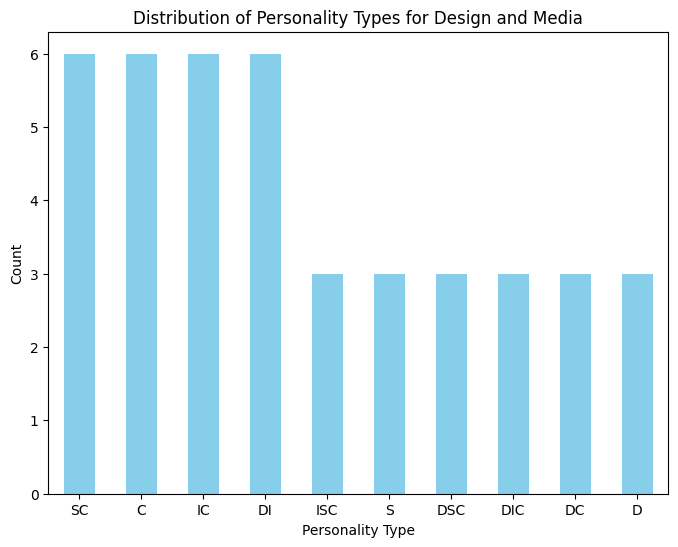

In [951]:
personality_counts = filtered_df['Type'].value_counts()

# Plot the bar graph
plt.figure(figsize=(8, 6))
personality_counts.plot(kind='bar', color='skyblue')
plt.xlabel('Personality Type')
plt.ylabel('Count')
plt.title(f'Distribution of Personality Types for {specific_major}')
plt.xticks(rotation=0)
plt.show()

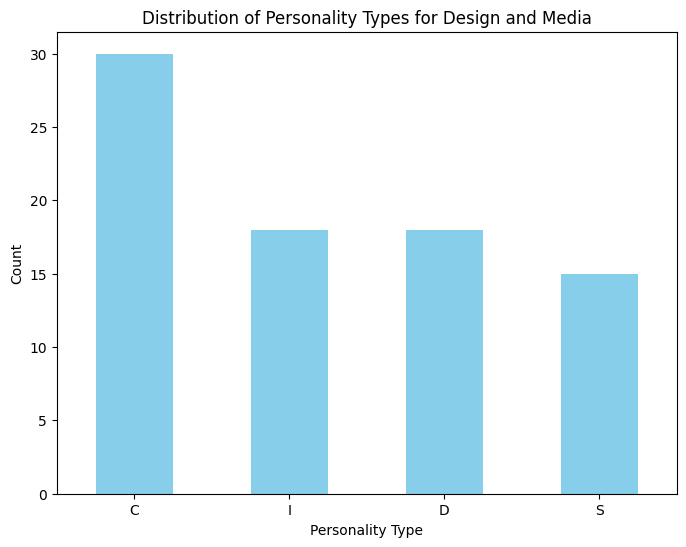

In [952]:
personality_counts = filtered_df['Type'].apply(lambda x: pd.Series(list(x))).unstack().value_counts()

# Plot the bar graph
plt.figure(figsize=(8, 6))
personality_counts.plot(kind='bar', color='skyblue')
plt.xlabel('Personality Type')
plt.ylabel('Count')
plt.title(f'Distribution of Personality Types for {specific_major}')
plt.xticks(rotation=0)
plt.show()

## Cosine Similarity

In [953]:
target_user = {
    "II":5,	"SR":5,	"OR"	:5,"IA"	:5,"CC":5,	"RS"	:5,"DAvg"	:5,"IAvg"	:5,"SAvg"	:5,"CAvg":5
}
target_user2 = [0,0,0,0,0,0,0,0,0,0]
ratings_filled2.loc[len(ratings_filled2.index)] = target_user
user_similarity_cosine = cosine_similarity(ratings_filled2)
user_similarity_cosine_df = pd.DataFrame(user_similarity_cosine)
user_similarity_cosine_df.head()
# Pick a user ID
picked_userid = len(ratings_filled2.index)-1
# Remove picked user ID from the candidate list
user_similarity_cosine_df.drop(index=picked_userid, inplace=True)
# Number of similar users
n = 10
# User similarity threashold
user_similarity_threshold = 0.3
# Get top n similar users
similar_users_cs = user_similarity_cosine_df[user_similarity_cosine_df[picked_userid]>user_similarity_threshold][picked_userid].sort_values(ascending=False)
# Print out top n similar users
print(f'The similar users for user {picked_userid} are', similar_users_cs)
# Convert output to dataframe
similar_users_cs_df = similar_users_cs.to_frame()
# name columns
similar_users_cs_df.index.name = "Users"
similar_users_cs_df.columns.name = "Columns"
# Print Results"
similar_users_cs_df.merge(comparison_df,on="Users",how="inner").to_dict()



The similar users for user 158 are 150    0.972427
97     0.972427
44     0.972427
4      0.572434
110    0.572434
57     0.572434
16     0.453731
69     0.453731
122    0.453731
9      0.425364
115    0.425364
62     0.425364
32     0.412638
85     0.412638
138    0.412638
51     0.410262
104    0.410262
157    0.410262
133    0.395695
80     0.395695
27     0.395695
66     0.383858
119    0.383858
13     0.383858
78     0.361814
131    0.361814
25     0.361814
108    0.340889
55     0.340889
2      0.340889
29     0.332663
82     0.332663
135    0.332663
84     0.307920
31     0.307920
137    0.307920
Name: 158, dtype: float64


{158: {150: 0.972426879044239,
  97: 0.972426879044239,
  44: 0.972426879044239,
  4: 0.5724336746653174,
  110: 0.5724336746653174,
  57: 0.5724336746653172,
  16: 0.4537305242432003,
  69: 0.4537305242432003,
  122: 0.45373052424320026,
  9: 0.425364055180092,
  115: 0.425364055180092,
  62: 0.42536405518009196,
  32: 0.4126381832432261,
  85: 0.4126381832432261,
  138: 0.4126381832432261,
  51: 0.41026247865364884,
  104: 0.41026247865364884,
  157: 0.41026247865364873,
  133: 0.39569549346359845,
  80: 0.39569549346359845,
  27: 0.39569549346359845,
  66: 0.3838579669298401,
  119: 0.3838579669298401,
  13: 0.3838579669298401,
  78: 0.36181361349331637,
  131: 0.36181361349331637,
  25: 0.36181361349331637,
  108: 0.3408893274903718,
  55: 0.3408893274903718,
  2: 0.3408893274903718,
  29: 0.3326633600589951,
  82: 0.33266336005899505,
  135: 0.33266336005899505,
  84: 0.3079201435678004,
  31: 0.3079201435678004,
  137: 0.3079201435678004},
 'What is/was your major?': {150: 'Compu

In [ ]:
from sklearn.model_selection import KFold
from sklearn.metrics import jaccard_similarity_score, pairwise_distances
from scipy.spatial.distance import correlation, cosine, euclidean

# Assuming you have a dataset called df with features and labels

# Define the number of folds for cross-validation
k = 5

# Initialize the evaluation metrics
jaccard_scores = []
pearson_scores = []
cosine_scores = []
euclidean_scores = []

# Perform k-fold cross-validation
kf = KFold(n_splits=k, shuffle=True, random_state=42)
for train_index, test_index in kf.split(merged_df):
    # Split the data into train and test sets
    train_data = merged_df.iloc[train_index]
    test_data = merged_df.iloc[test_index]

    # Assuming you have two arrays or dataframes for comparing the algorithms: true_labels and predicted_labels
    train_true_labels = train_data['Major'].values
    test_true_labels = test_data['Major'].values
    # Perform the necessary calculations on the train and test data
    # ...

    # Calculate the evaluation metrics
    jaccard_similarity = jaccard_similarity_score(true_labels, predicted_labels)
    pearson_correlation = 1 - correlation(true_labels, predicted_labels)
    cosine_similarity = 1 - cosine(true_labels, predicted_labels)
    euclidean_distance = euclidean(true_labels, predicted_labels)

    # Store the evaluation metrics
    jaccard_scores.append(jaccard_similarity)
    pearson_scores.append(pearson_correlation)
    cosine_scores.append(cosine_similarity)
    euclidean_scores.append(euclidean_distance)

# Compute the average scores across all folds
average_jaccard = sum(jaccard_scores) / len(jaccard_scores)
average_pearson = sum(pearson_scores) / len(pearson_scores)
average_cosine = sum(cosine_scores) / len(cosine_scores)
average_euclidean = sum(euclidean_scores) / len(euclidean_scores)

# Print the average scores
print("Average Jaccard Similarity:", average_jaccard)
print("Average Pearson Correlation:", average_pearson)
print("Average Cosine Similarity:", average_cosine)
print("Average Euclidean Distance:", average_euclidean)
